# Tutorial on image generation with this library

In [1]:
# Load in the relevant packages
import os, sys
sys.path.insert(0,'/groups/astro/troels/python')
sys.path.insert(0,'/groups/astro/troels/python/sfrimann')
sys.path.insert(0,'/groups/astro/troels/python/sigurd')
sys.path.insert(0,'/groups/astro/andreask/python')

import numpy as np
import matplotlib.pyplot as plt
import astropy.units as unit
import astropy.constants as cnst
from matplotlib.patches import Ellipse
from matplotlib.offsetbox import AuxTransformBox, AnchoredOffsetbox

# This plugin
import unnamedvisualizer as uv

Fast (Fortran90) Mie-scattering module could not be imported. Falling back to the slower Python version.
RADMC data folder specified as '/groups/astro/andreask/radmc', and RAMSES data paths have been supplied to the following sinks: ['13', '13.22', '13.24', '24']


See "sink_config.py" for ensuring that your data shows up in the above message

## Generating single wavelength images

One can easily generate single-wavelength images (pseudo-continuum images) using the command `single_wavelength_image` in the `data` subpackage.

One can also easily plot the images (with and without formerly generating them) using the `plot` subpackage.

*(Hopefully in the future the plotting capability can be handled as part of the image class - working on this soon)*

An image of this configuration doesn't exist. Creating it...
Coordinate basis already generated, loading from file...
Executing RADMC-3D Command:
/lustre/astro/troels/radmc3d/bin/radmc3d image npix 800 incl 52.788266426013536 sizeau 1000 lambda 1300 phi 156.02509359452873 posang 147.56132682176116 pointau 0.0  0.0  0.0 fluxcons nostar setthreads 4 doppcatch
  
      WELCOME TO RADMC-3D: A 3-D CONTINUUM AND LINE RT SOLVER    
                                                                 
                          VERSION 2.0                            
                                                                 
                (c) 2008-2023 Cornelis Dullemond                 
                                                                 
       Please feel free to ask questions. Also please report     
        bugs and/or suspicious behavior without hestitation.     
      The reliability of this code depends on your vigilance!    
                    dullemond@uni-heidelber

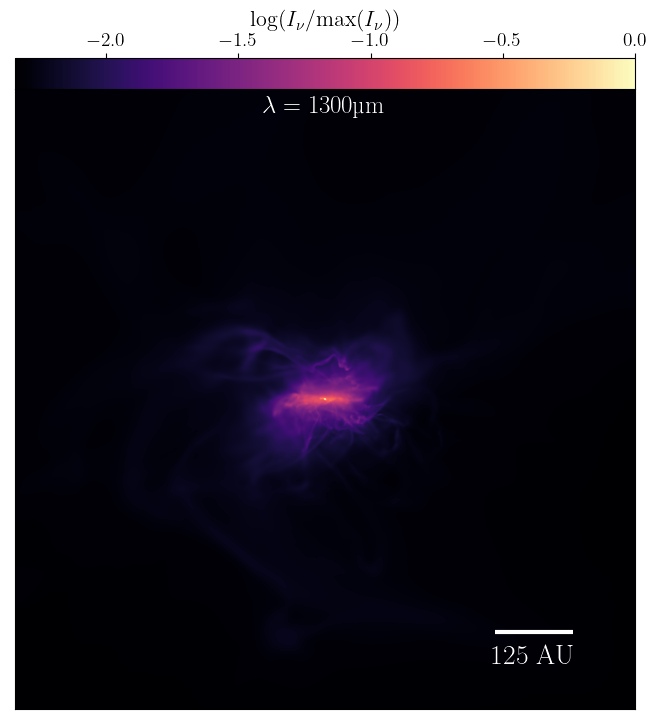

In [4]:
# I would like to plot a 800x800 pixel image with a width/height of 1000 AU at 1.3mm wavelength
uv.plot.plot_single_image(isink=24, iout=1005, npix=800, wav=1300, sizeau=1000, setthreads=4, view="edge-on-A", log=True)

## Generating molecular lines image

Similarly an image can be created for a specific molecular line transition if molecular line data is present in the sink's RADMC data folder

Like above one can either use the `data.molecular_lines_image` function, or plot either a moment map with `plot.plot_moment_map` or `plot.channel_map` with the image data.

In this case it loads in an image I have previously generated

*(Like above I am working on implementing this into the image class output from the data subpackage functions!)*

An image for this configuration already exists. Loading...
Reading /groups/astro/andreask/radmc/sink024/nout1005/saved_images/image-c18o-edge-on-A-npix800-1000au-transition2-widthkms4-lines21.out
Distance to source given. Converting flux unit to Jy/px...


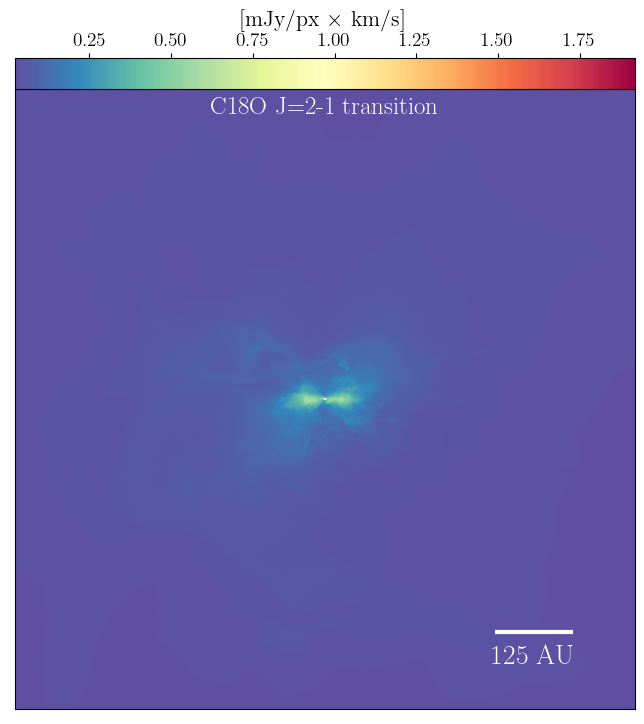

In [3]:
# I would like to plot a 800x800 pixel image with a width/height of 1000 AU for the J = 2-1 transition of C18O (which in my lines.inp file is set as molecule no. 3)
# One has to further specify the resolution (given by widthkms and linenlam parameters) as well as set a distance to the source (dpc) for meaningful unit output
uv.plot.plot_moment_map(isink=24, iout=1005, npix=800, sizeau=1000, setthreads=4, iline=2, widthkms=4, linenlam=21, imolspec=3, moment=0, view="edge-on-A", dpc=140)

## Creating synthetic ALMA observations

One can take this image generation one step further by generating synthetic ALMA observations using the image generation function mentioned above, by setting `casa = True`. Further keywords that need to be supplied are: `antennalist`, `totaltime`, `threshold`, `niter`.

In this case I would like to load in the data myself and create a peak intensity map, but one can also call the `create_moment_map` function described above using the CASA keywords to get a moment map.

In [2]:
img = uv.data.molecular_lines_image(13.24, 850, npix=3500, sizeau=3000, setthreads=256, iline=2, widthkms=4, linenlam=41, imolspec=1, view="edge-on-a", dpc=140, 
                                    writefits=True, casa=True, antennalist=['alma.cycle7.8.cfg', 'alma.cycle7.5.cfg'], totaltime=['15h', '3h'], threshold="4mJy", 
                                    niter=5000, verbose=1)

An image for this configuration already exists. Loading...
Creating CASA image...
The requested image has already been generated. Loading...


....10....20....30....40....50....60....70....80....90....100%


CASA gives us an RMS value which we can use to mask out pixels. This can be done below:

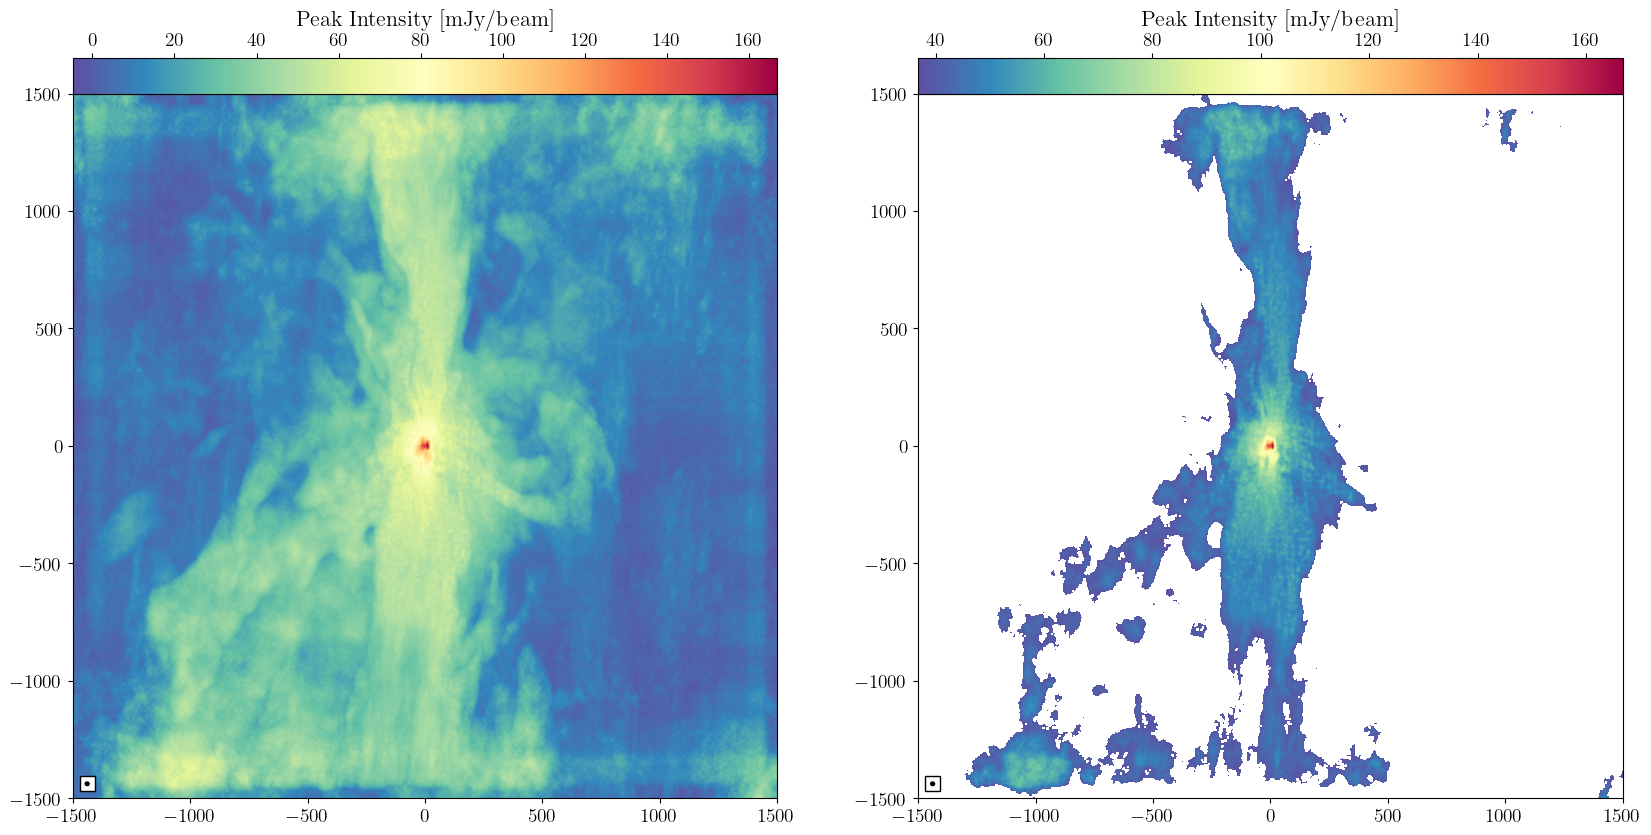

In [ ]:
mmap8 = img.image.max(axis=2)
masked_mmap8 = np.ma.masked_less_equal(mmap8, 3*img.rms)

# Plot each one
fig, ax = plt.subplots(1, 2, figsize=(20,12))
im1 = ax[0].imshow(mmap8 * 1e3, cmap="Spectral_r", extent=(-1500,1500,-1500,1500))
plt.colorbar(im1, ax=ax[0], label="Peak Intensity [mJy/beam]", location="top", orientation="horizontal", pad=0)
im2 = ax[1].imshow(masked_mmap8 * 1e3, cmap="Spectral_r", extent=(-1500,1500,-1500,1500))
plt.colorbar(im2, ax=ax[1], label="Peak Intensity [mJy/beam]", location="top", orientation="horizontal", pad=0)

# The beam is also supplied in the image class in case one wants to display this
for iax in ax:
    aux_tr_box = AuxTransformBox(iax.transData)
    aux_tr_box.add_artist(Ellipse((0,0), img.beam[0] * img.sizepix_x/unit.AU.to(unit.cm), img.beam[1] * img.sizepix_y/unit.AU.to(unit.cm), img.beam[2], color="black"))
    box = AnchoredOffsetbox(child=aux_tr_box, loc="lower left", frameon=True)
    iax.add_artist(box)

The built-in plotting functions automatically handle creating a colorbar, plotting the beam and a scale bar. One can supply an axis keyword to the plotting function to plot these directly into a figure, as shown below

An image for this configuration already exists. Loading...
Creating CASA image...
The requested image has already been generated. Loading...


....10....20....30....40....50....60....70....80....90....100%


An image for this configuration already exists. Loading...
Creating CASA image...
The requested image has already been generated. Loading...


....10....20....30....40....50....60....70....80....90....100%


The requested image has already been generated. Loading...


....10....20....30....40....50....60....70....80....90....100%


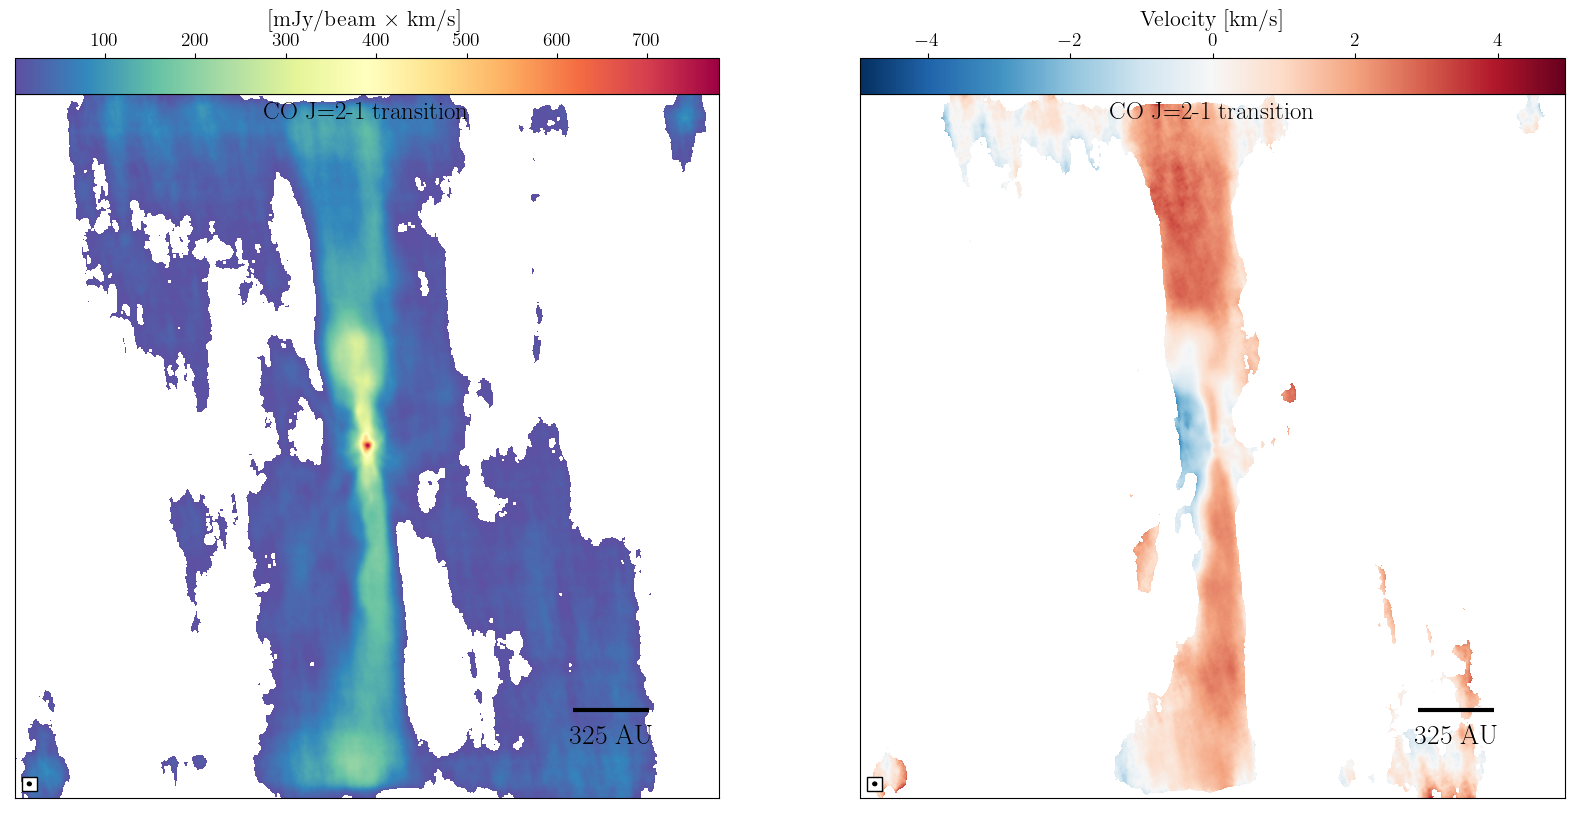

In [2]:
fig, ax = plt.subplots(1, 2, figsize=(20,12))

uv.plot.plot_moment_map(13.24, 850, npix=3500, sizeau=3000, setthreads=256, iline=2, widthkms=4, linenlam=41, imolspec=1, view="edge-on-a", dpc=140, moment=0,
                                    writefits=True, casa=True, antennalist=['alma.cycle7.8.cfg', 'alma.cycle7.5.cfg'], totaltime=['15h', '3h'], threshold="4mJy", 
                                    niter=5000, verbose=1, ax=ax[0])
uv.plot.plot_moment_map(13.24, 850, npix=3500, sizeau=3000, setthreads=256, iline=2, widthkms=4, linenlam=41, imolspec=1, view="edge-on-a", dpc=140, moment=1,
                                    writefits=True, casa=True, antennalist=['alma.cycle7.8.cfg', 'alma.cycle7.5.cfg'], totaltime=['15h', '3h'], threshold="4mJy", 
                                    niter=5000, verbose=1, ax=ax[1])